In [5]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from multiprocessing import Pool
from nest import overlap_try as overlap
from nest import detectors   
from astropy.cosmology import Planck18
from nest import pls_try as pls
import matplotlib.cm as cm
from scipy.integrate import simps

cosmo = Planck18
H0 =  cosmo.H0.to('1/s').value 
#
plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['font.family'] = 'serif'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
f_15km, psd_hf_15km, psd_lf_15km, psd_15km = np.loadtxt('psd/18213_ET15kmcolumns.txt', unpack=True)
f, pls_15km_coba = np.loadtxt('PLS_CoBA_store/h2_Omega_PLS_SNR_1_Tobs_1yr_2L0deg_15km_HFLFcryo.txt', unpack=True)

Ni = np.interp(f, f_15km, psd_15km)

orf = overlap.overlap('ET L1', 'ET L2', f, 0, 't', np.deg2rad(0))

(1000, 3000)


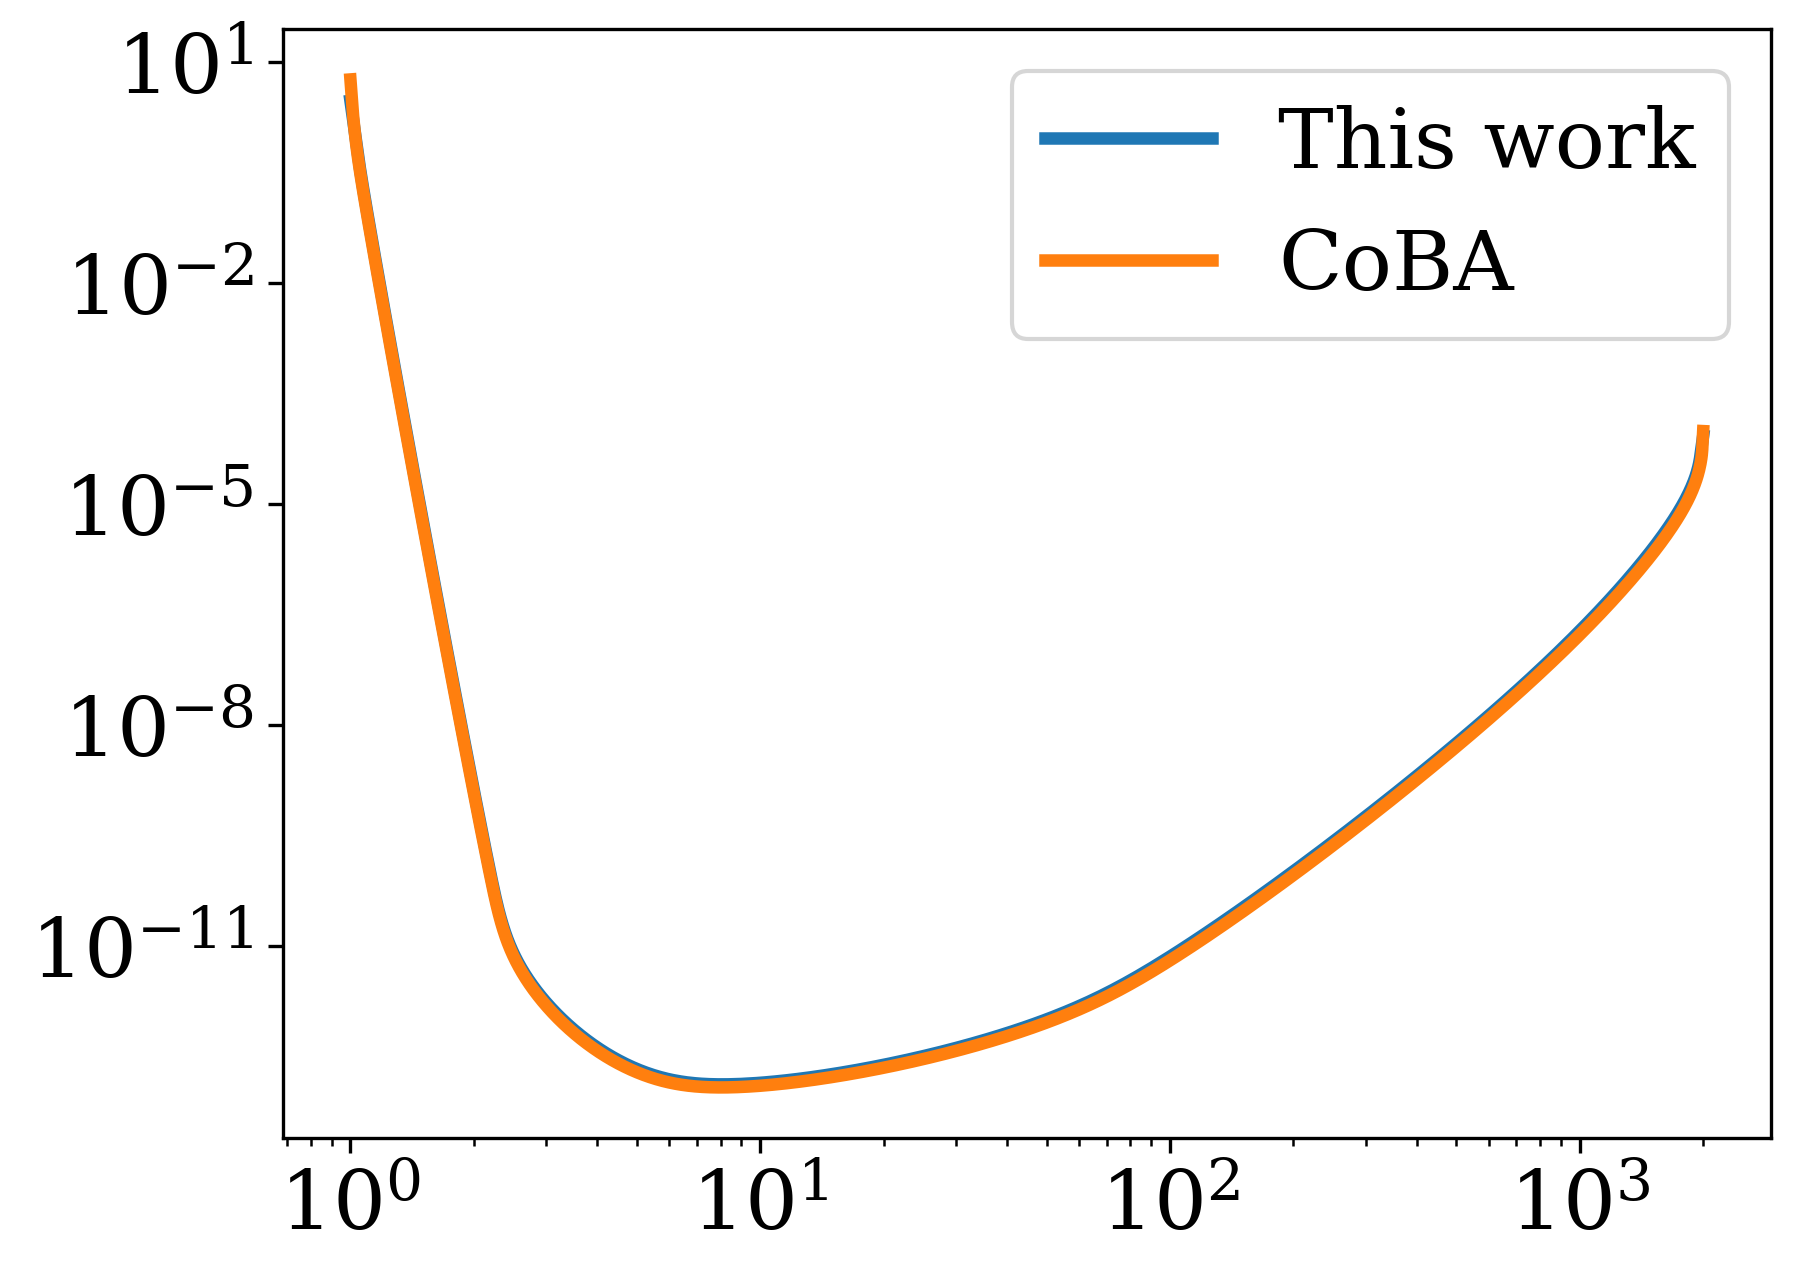

2.2182612048579093


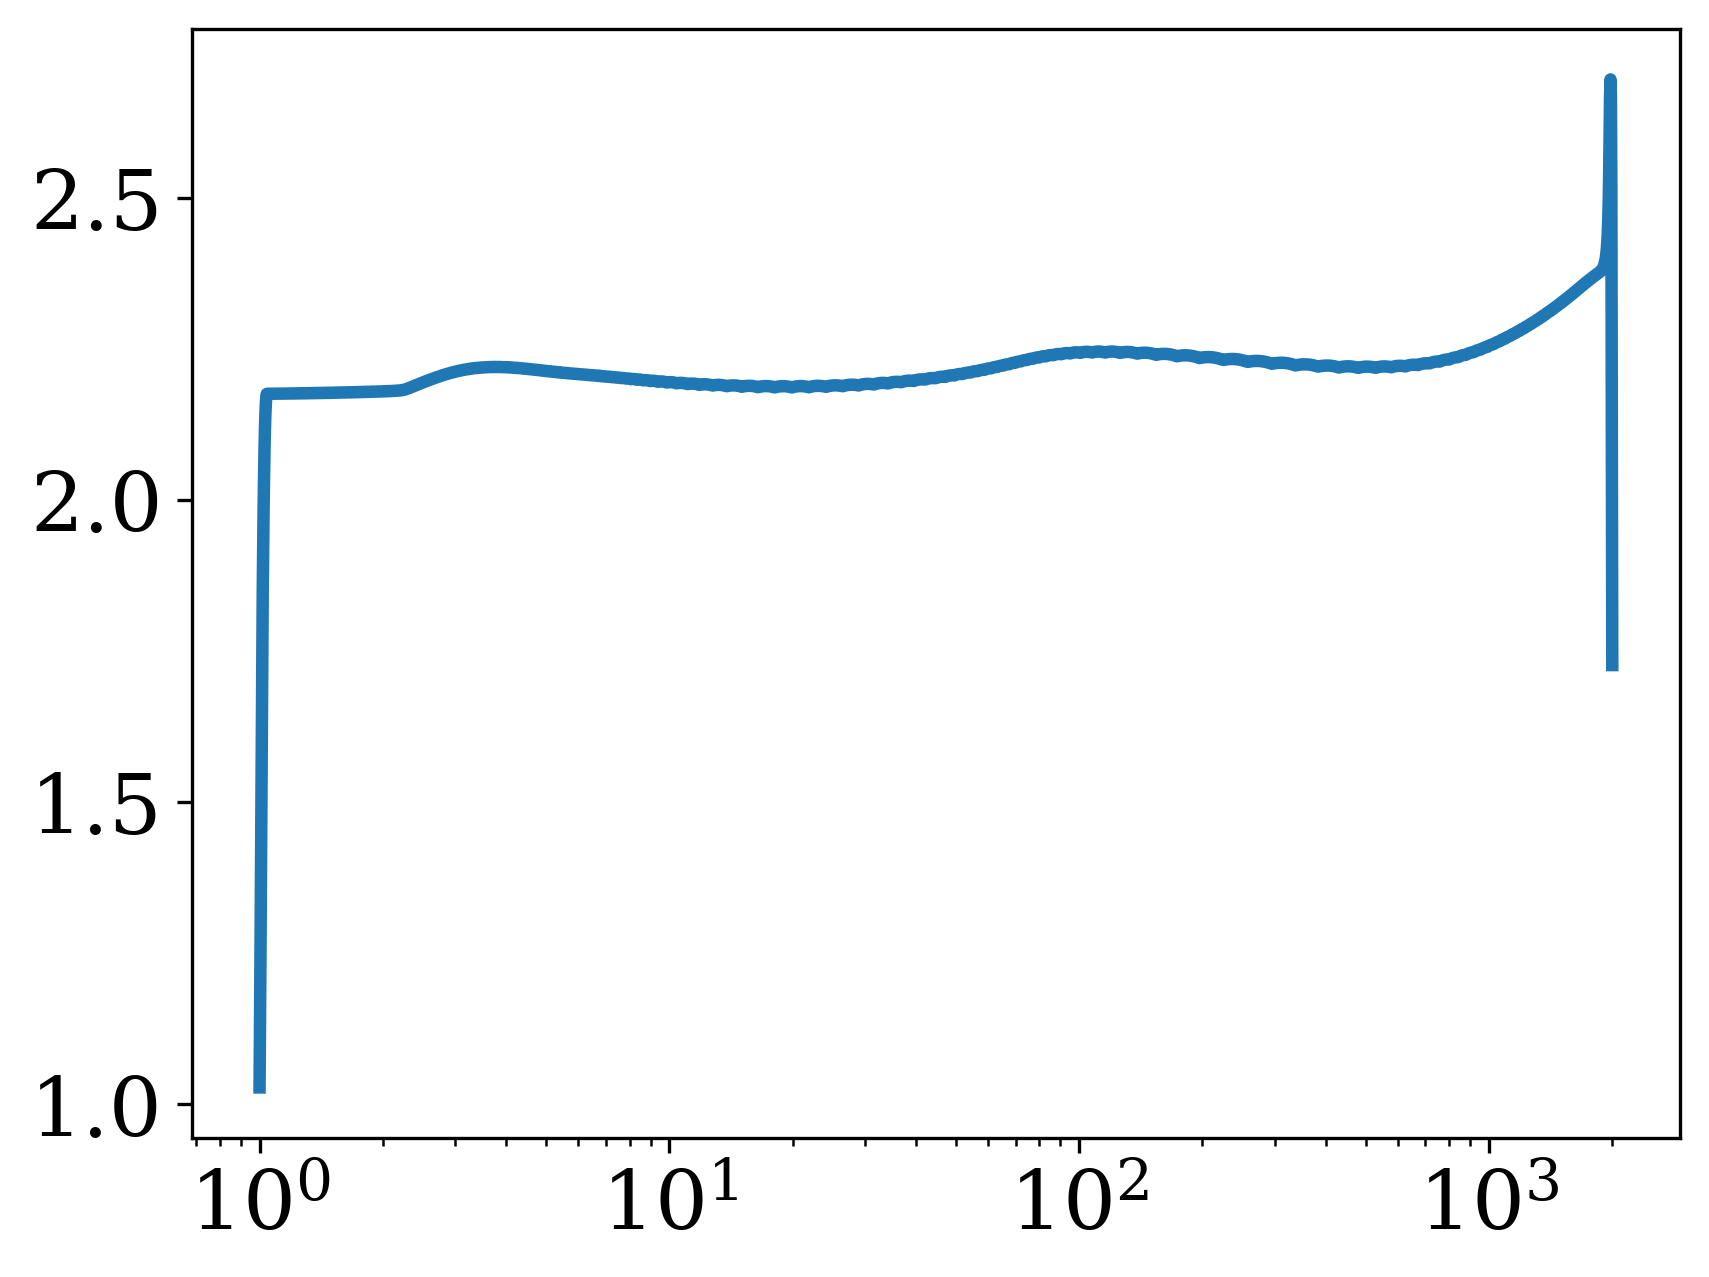

In [9]:
fref = 10
snr = 1
Tobs = 1 * 365 * 24 * 3600
beta_min = -40
beta_max = 40
beta = np.linspace(beta_min, beta_max, 1000)

Omegas = []

for b in beta:
    Seff = Ni/np.abs(orf)
    Omegaeff = 10 * np.pi**2 * f**3 * Seff / (3 * H0**2)
    Obeta = snr / np.sqrt(2 * Tobs * np.trapz(((f / fref)**(2*b)) / (Omegaeff**2), f))
    Omegas.append(Obeta * (f/fref)**(b))

Omegas = np.array(Omegas)

print(Omegas.shape)

pls = np.zeros_like(f)

for i in range(len(f)):
    pls[i] = np.max(Omegas[:, i])

f_pls_15km_coba, pls_15km_coba = np.loadtxt('PLS_CoBA_store/h2_Omega_PLS_SNR_1_Tobs_1yr_2L0deg_15km_HFLFcryo.txt', unpack=True)


plt.plot(f, pls*0.5, label='This work')
plt.plot(f_pls_15km_coba, pls_15km_coba, label='CoBA') 
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()

print(np.mean(pls/pls_15km_coba))
plt.plot(f, pls/pls_15km_coba)
plt.xscale('log')
plt.show()



